# IMPORTS

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tiler import Tiler, Merger
from itertools import combinations
from PIL import Image, ImageDraw

# EXP I

In [ ]:
file_ = '/home/alvin/Documents/ELISA/ILRI - Zoology ELISA wells images+readings/RUNS PHASE 2/PRRV  PHASE 2-done/Photos Masaka box 1/After/IMG_6714.JPG'

In [ ]:
image_cv = cv2.imread(file_)
image_rgb = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)
imgray = cv2.cvtColor(image_cv, cv2.COLOR_BGR2GRAY)

In [ ]:
img = cv2.GaussianBlur(imgray,(7,7),sigmaX=1.5, sigmaY=1.5)

In [ ]:
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,0.5,180,
                            param1=50,param2=25,minRadius=80,maxRadius=96)
circles = np.uint16(np.around(circles))

In [ ]:
cimg = image_rgb.copy()
count = 0
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),10)
    count+=1

In [ ]:
print(count)

96


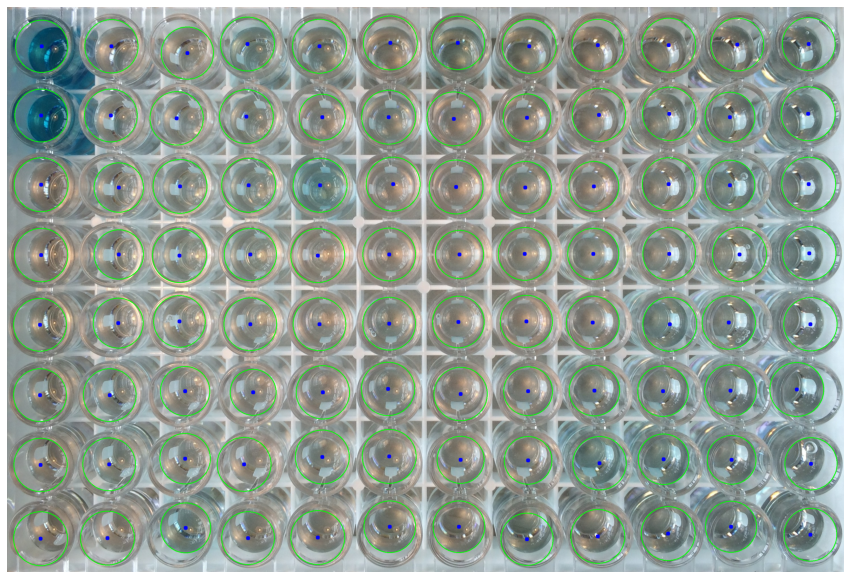

In [ ]:
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(cimg)
plt.show()

In [ ]:
def tile(img, tile_shape, channel_dimension=None):
  rows = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
  columns = range(1,13)

  labels = []
  labels.extend(rows)
  labels.extend(columns)

  wells = [loc[0]+str(loc[1]) for loc in list(combinations(labels, 2)) if not str(loc[0]).isnumeric() and str(loc[1]).isnumeric()]

  tile_dict = {}
  tiler = Tiler(data_shape=img.shape,
                tile_shape=tile_shape,
                channel_dimension=channel_dimension)

  tiles = [tile for _, tile in tiler(img)]
  tile_dict = {key:value for key, value in zip(wells, tiles)}

  return tile_dict

In [ ]:
# print((cimg.shape[0]/8, cimg.shape[1]/12))

tile_dict = tile(cimg, (249,247,3))

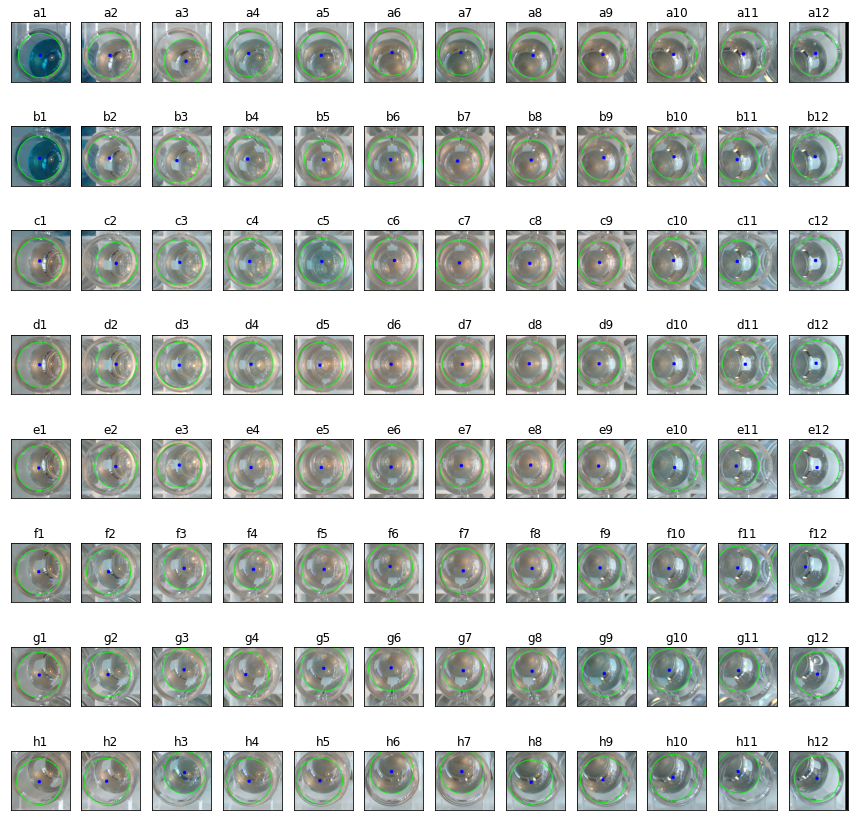

In [ ]:
plt.figure(figsize=(15,15))
keys = list(tile_dict.keys())

for i in range(len(keys)):
  ax = plt.subplot(8, 12, i+1)
  plt.title(f'{keys[i]}')
  plt.xticks([])
  plt.yticks([])
  plt.imshow(tile_dict[keys[i]])

#plt.subplots_adjust(hspace=-0.5)

# EXP II

In [ ]:
file_ = '/home/alvin/Documents/ELISA/ILRI - Zoology ELISA wells images+readings/RUNS PHASE 2/PRRV  PHASE 2-done/Photos Masaka box 1/After/IMG_6714.JPG'

In [ ]:
image_cv = cv2.imread(file_)
image_rgb = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)

In [ ]:
rows = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
columns = range(1,13)

labels = []
labels.extend(rows)
labels.extend(columns)

wells = [loc[0]+str(loc[1]) for loc in list(combinations(labels, 2)) if not str(loc[0]).isnumeric() and str(loc[1]).isnumeric()]

In [ ]:
def tile(img, tile_shape, channel_dimension=None):
  tile_dict = {}
  tiler = Tiler(data_shape=img.shape,
                tile_shape=tile_shape,
                channel_dimension=channel_dimension)

  tiles = [tile for _, tile in tiler(img)]
  tile_dict = {key:value for key, value in zip(wells, tiles)}

  return tile_dict

def get_center(img):
  imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  imgray = cv2.GaussianBlur(imgray,(7,7),sigmaX=1.5, sigmaY=1.5)

  circles = cv2.HoughCircles(imgray,cv2.HOUGH_GRADIENT,0.5,180,
                            param1=50,param2=25,minRadius=80,maxRadius=96)
  circles = np.uint16(np.around(circles))

  centers = []

  for i in circles[0,:]:
      # draw the outer circle
      cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
      # draw the center of the circle
      cv2.circle(img,(i[0],i[1]),2,(0,0,255),10)

      centers.append((i[0],i[1]))

  return centers[0]

In [ ]:
tile_dict = tile(image_rgb, (249,247,3))

In [ ]:
centers_dict = {key:value for key, value in zip(list(tile_dict.keys()), [get_center(img) for img in list(tile_dict.values())])}

In [ ]:
rgb_dict = {well:img[center] for well, img, center in zip(wells, list(tile_dict.values()), list(centers_dict.values()))}

In [ ]:
plt.figure(figsize=(30,30))
keys = list(tile_dict.keys())

for i in range(len(keys)):
  ax = plt.subplot(8, 12, i+1)
  plt.title(f'{keys[i]}\n{rgb_dict[keys[i]]}')
  plt.xticks([])
  plt.yticks([])
  plt.imshow(tile_dict[keys[i]])

#plt.subplots_adjust(wspace=2)

In [ ]:
df = pd.DataFrame(data=rgb_dict, index=["r", "g", "b"]).T.reset_index().rename(columns={'index':'well_number'})

In [ ]:
df

,well_number,r,g,b
0,a1,12,69,88
1,a2,0,0,255
2,a3,127,127,115
3,a4,0,0,255
4,a5,108,110,99
...,...,...,...,...
91,h8,106,114,101
92,h9,0,0,255
93,h10,98,107,112
94,h11,0,0,255
